# Dados ENEM 2022


*   **Autor:** Igor de Carvalho
*   **Data:** 05/11/2023
*   **Descrição:** Esse notebook apresenta uma análise do desempenho acadêmico dos candidatos do ENEM 2022. A base de dados foi retirada diretamente do INEP e necessita bastante tratamento prévio.

---

**Etapas do processo de análise:**


1.   Importação das bibliotecas necessárias.
2.   Leitura e tratamento da base de dados.
3.   Análise preliminar.
4.   Aplicação do algoritmo K-Means, utilizando o "método do cotovelo".
5.   Análise do K-Means.
6.   Aplicação do algoritmo Árvore de Decisão.
7.   Análise da Árvore de Decisão.
8.   Conclusões.

## 1 - Importação das bibliotecas necessárias

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

## 2 - Leitura e tratamento da base de dados.

Obs.: Devido ao grande volume de dados, não foi possível armazená-los no repositório do GitHub, portanto faremos a leitura deles diretamente do Google Drive.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Unicarioca/11º Semestre/TCC/DADOS/MICRODADOS_ENEM_2022.csv", encoding = "latin1", sep = ";")
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,...,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,E,A,B,B
3476103,210056983033,2022,3,M,1,3,1,2,0,3,...,B,A,B,D,A,A,E,A,B,B


Como podemos verificar, o volume de dados é muito grande e não vamos precisar utilizar todas essas variáveis em nossas análises. Sendo assim, antes de prosseguirmos com as análises, vamos extrair as variáveis necessárias e criar um novo arquivo CSV, mais consolidado, que vamos armazenar no GitHub e usar para as análises.

Para realizarmos essa divisão dos dados, vamos usar o arquivo "*Dicionário_Microdados_Enem_2022*", disponível no GitHub: https://github.com/Simos-Sigurd/TCC/blob/main/Dicion%C3%A1rio_Microdados_Enem_2022.xlsx

Para as nossas análises nós vamos utilizar as seguintes variáveis:



*   NU_INSCRICAO (Nº de inscrição do candidato)
*   TP_FAIXA_ETARIA (Faixa etária)
*   TP_COR_RACA (Cor/Raça)
*   TP_ST_CONCLUSAO (Situação de conclusão do Ensino Médio)
*   TP_ESCOLA (Tipo de escola do Ensino Médio)
*   TP_ENSINO (Tipo de instiuição de concluiu ou concluirá o Ensino Médio)
*   NU_NOTA_CN (Nota da prova de Ciências da Natureza)
*   NU_NOTA_CH (Nota da prova de Ciências Humanas)
*   NU_NOTA_LC (Nota da prova de Linguagens e Códigos)
*   NU_NOTA_MT (Nota da prova de Matemática)
*   NU_NOTA_REDACAO (Nota da prova de Redação)

A base de dados também possui as respostas do questionário socioeconômico. Algumas informações podem ser relevantes, vamos extrair algumas dessas informações para análises futuras:

*   Q001 (Até que série seu pai, ou o homem responsável por você, estudou?)
*   Q002 (Até que série sua mãe, ou a mulher responsável por você, estudou?)
*   Q005 (Incluindo você, quantas pessoas moram atualmente em sua residência?)
*   Q006 (Qual é a renda mensal de sua família?)
*   Q024 (Na sua residência tem computador?)
*   Q025 (Na sua residência tem acesso à Internet?)




In [ ]:
colunas_desejadas = ["NU_INSCRICAO", "TP_FAIXA_ETARIA", "TP_COR_RACA",
                     "TP_ST_CONCLUSAO", "TP_ESCOLA", "TP_ENSINO",
                     "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC",
                     "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q001", "Q002", "Q005", "Q006", "Q024", "Q025"]
new_df = df.loc[:, colunas_desejadas]
new_df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,210057943671,14,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,A,A,3,B,A,A
1,210057516120,14,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,D,D,3,Q,E,B
2,210057280536,5,2,1,1,NaN,421.1,546.0,498.8,565.3,760.0,E,F,2,B,A,B
3,210055724397,6,3,1,1,NaN,490.7,388.6,357.8,416.0,320.0,C,A,3,A,B,B
4,210055097896,4,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,D,B,2,B,A,A


Mesmo reduzindo o conjunto de dados para um dataset mais consolidado, ainda sim o volume é muito grande para ser armazenado no GitHub, portanto continuaremos trabalhando com o Google Drive.

Vamos criar um novo arquivo com esses dados consolidados.

In [ ]:
new_df.to_csv("Enem_2022_Consolidado.csv", index = False)

Agora podemos retomar análise dos dados, vamos começar renomeando as colunas para tornar a leitura mais fácil.

In [ ]:
new_df.rename(columns = {"NU_INSCRICAO":"ID_Candidato", "TP_FAIXA_ETARIA":"Faixa_Etaria",
                     "TP_COR_RACA":"Cor_Raca", "TP_ST_CONCLUSAO":"Conclusao_EM",
                     "TP_ESCOLA":"Tipo_EM", "TP_ENSINO":"Tipo_Conclusao_EM",
                     "NU_NOTA_CN":"Nota_CN", "NU_NOTA_CH":"Nota_CH", "NU_NOTA_LC":"Nota_LC",
                     "NU_NOTA_MT":"Nota_Matematica", "NU_NOTA_REDACAO":"Nota_Redacao"}, inplace = True)
new_df.head()

,ID_Candidato,Faixa_Etaria,Cor_Raca,Conclusao_EM,Tipo_EM,Tipo_Conclusao_EM,Nota_CN,Nota_CH,Nota_LC,Nota_Matematica,Nota_Redacao,Q001,Q002,Q005,Q006,Q024,Q025
0,210057943671,14,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,A,A,3,B,A,A
1,210057516120,14,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,D,D,3,Q,E,B
2,210057280536,5,2,1,1,NaN,421.1,546.0,498.8,565.3,760.0,E,F,2,B,A,B
3,210055724397,6,3,1,1,NaN,490.7,388.6,357.8,416.0,320.0,C,A,3,A,B,B
4,210055097896,4,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,D,B,2,B,A,A


Imediatamente, já podemos perceber alguns campos em branco, vamos tratar esses dados.

In [ ]:
new_df.isna().sum()

ID_Candidato               0
Faixa_Etaria               0
Cor_Raca                   0
Conclusao_EM               0
Tipo_EM                    0
Tipo_Conclusao_EM    2213361
Nota_CN              1120710
Nota_CH               982663
Nota_LC               982663
Nota_Matematica      1120710
Nota_Redacao          982663
Q001                       0
Q002                       0
Q005                       0
Q006                       0
Q024                       0
Q025                       0
dtype: int64

Queremos excluir somente as linhas onde **todas** as colunas referente às **notas** estejam **em branco**, pois podemos entender que esse candidato não fez a prova ou teve a mesma anulada, sendo assim não influenciará no resultado de nossas análises.

Porém, em casos onde o candidato possua pelo menos uma nota registrada, vamos manter a linha pois entendemos que o candidato realizou a prova.

In [ ]:
colunas_verificar = ["Nota_CN", "Nota_CH", "Nota_LC", "Nota_Matematica", "Nota_Redacao"]

df_final = new_df.dropna(subset = colunas_verificar, how = "all")
df_final = df_final.reset_index(drop = True)

df_final.head()

,ID_Candidato,Faixa_Etaria,Cor_Raca,Conclusao_EM,Tipo_EM,Tipo_Conclusao_EM,Nota_CN,Nota_CH,Nota_LC,Nota_Matematica,Nota_Redacao,Q001,Q002,Q005,Q006,Q024,Q025
0,210057280536,5,2,1,1,NaN,421.1,546.0,498.8,565.3,760.0,E,F,2,B,A,B
1,210055724397,6,3,1,1,NaN,490.7,388.6,357.8,416.0,320.0,C,A,3,A,B,B
2,210055778089,6,2,1,1,NaN,398.1,427.3,400.2,404.9,440.0,E,E,5,B,A,B
3,210055461467,4,3,1,1,NaN,467.5,461.0,466.7,435.3,360.0,E,E,2,B,A,B
4,210054972570,2,1,2,3,1.0,458.7,539.8,488.2,456.8,940.0,E,E,4,B,A,B


Pronto, agora temos apenas os cadidatos que realizaram a prova, mas ainda possuímos informações em branco. Vamos ver como está a distribuição desses campos em branco:

In [ ]:
df_final.isna().sum()

ID_Candidato               0
Faixa_Etaria               0
Cor_Raca                   0
Conclusao_EM               0
Tipo_EM                    0
Tipo_Conclusao_EM    1511673
Nota_CN               148619
Nota_CH                10572
Nota_LC                10572
Nota_Matematica       148619
Nota_Redacao           10572
dtype: int64

Podemos ver que temos muitos candidatos que possuem notas para algumas provas e outras não. Como o ENEM é dividido em dois dias, é possível que isso se dê pelo fato de alguns alunos comparecerem em apenas uma dos dias de prova, ocasionando a nota **zero** nas provas do dia em que faltaram. Vamos seguir esse entendimento e para todos os campos de nota em branco, vamos atribuir o valor **zero**.

In [ ]:
colunas_preencher = {"Nota_CN": 0, "Nota_CH": 0, "Nota_LC": 0, "Nota_Matematica": 0, "Nota_Redacao": 0}

df_final.fillna(colunas_preencher, inplace = True)

df_final.isna().sum()

ID_Candidato               0
Faixa_Etaria               0
Cor_Raca                   0
Conclusao_EM               0
Tipo_EM                    0
Tipo_Conclusao_EM    1511673
Nota_CN                    0
Nota_CH                    0
Nota_LC                    0
Nota_Matematica            0
Nota_Redacao               0
Q001                       0
Q002                       0
Q005                       0
Q006                       0
Q024                       0
Q025                       0
dtype: int64

Agora resta apenas o campo Tipo_Conclusao_EM com campos em branco para serem tratados, nesse caso vamos substituir os valores em branco pelo valor mais frequente na coluna (Moda).

In [ ]:
moda = df_final['Tipo_Conclusao_EM'].mode()[0]

df_final.fillna(moda, inplace = True)

df_final.isna().sum()

ID_Candidato         0
Faixa_Etaria         0
Cor_Raca             0
Conclusao_EM         0
Tipo_EM              0
Tipo_Conclusao_EM    0
Nota_CN              0
Nota_CH              0
Nota_LC              0
Nota_Matematica      0
Nota_Redacao         0
Q001                 0
Q002                 0
Q005                 0
Q006                 0
Q024                 0
Q025                 0
dtype: int64

Pronto! Agora não temos mais campos em branco para atrapalhar nossas análises. Antes de prosseguir, vamos realizar mais um tratamento nos dados que será muito importante.

O ENEM é composto por várias provas, mas para que possamos medir o desempenho dos alunos precisamos especificar valores de comparação. Podemos dividir as provas do enem em Exatas (CN - Ciências da Natureza e Matemática) e Humanas (CH - Ciências Humans, LC - Linguagens e Códigos e Redação). Portanto vamos criar 2 novos campos: Nota_Exatas, Nota_Humatas.

Também precisamos calcular a nota final dos candidatos, que é o resultado obtido ao prestar o ENEM, assim também criaremos um terceiro campo chamado Nota_Final que conterá a média aritmética dos campos Nota_CN, Nota_CH, Nota_LC, Nota_Matematica e Nota_Redacao.

In [ ]:
df_final["Nota_Exatas"] = df_final[["Nota_CN", "Nota_Matematica"]].mean(axis = 1).round(1)
df_final["Nota_Humanas"] = df_final[["Nota_CH", "Nota_LC", "Nota_Redacao"]].mean(axis = 1).round(1)
df_final["Nota_Final"] = df_final[["Nota_CN", "Nota_CH", "Nota_LC", "Nota_Matematica", "Nota_Redacao"]].mean(axis = 1).round(1)

df_final.head()

,ID_Candidato,Faixa_Etaria,Cor_Raca,Conclusao_EM,Tipo_EM,Tipo_Conclusao_EM,Nota_CN,Nota_CH,Nota_LC,Nota_Matematica,Nota_Redacao,Q001,Q002,Q005,Q006,Q024,Q025,Nota_Exatas,Nota_Humanas,Nota_Final
0,210057280536,5,2,1,1,1.0,421.1,546.0,498.8,565.3,760.0,E,F,2,B,A,B,493.2,601.6,558.2
1,210055724397,6,3,1,1,1.0,490.7,388.6,357.8,416.0,320.0,C,A,3,A,B,B,453.4,355.5,394.6
2,210055778089,6,2,1,1,1.0,398.1,427.3,400.2,404.9,440.0,E,E,5,B,A,B,401.5,422.5,414.1
3,210055461467,4,3,1,1,1.0,467.5,461.0,466.7,435.3,360.0,E,E,2,B,A,B,451.4,429.2,438.1
4,210054972570,2,1,2,3,1.0,458.7,539.8,488.2,456.8,940.0,E,E,4,B,A,B,457.8,656.0,576.7


## 3 - Análise Preliminar

Agora que terminamos todos os tratamentos necessários nessa base de dados do ENEM de 2022, podemos prosseguir com nossas análises. Vamos começar checando a performance dos candidatos por Cor/Raça, onde:


0.   Não declarada
1.   Branca
2.   Preta
3.   Parda
4.   Amarela
5.   Não dispõe da informação


<ipython-input-20-92dc333b967b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


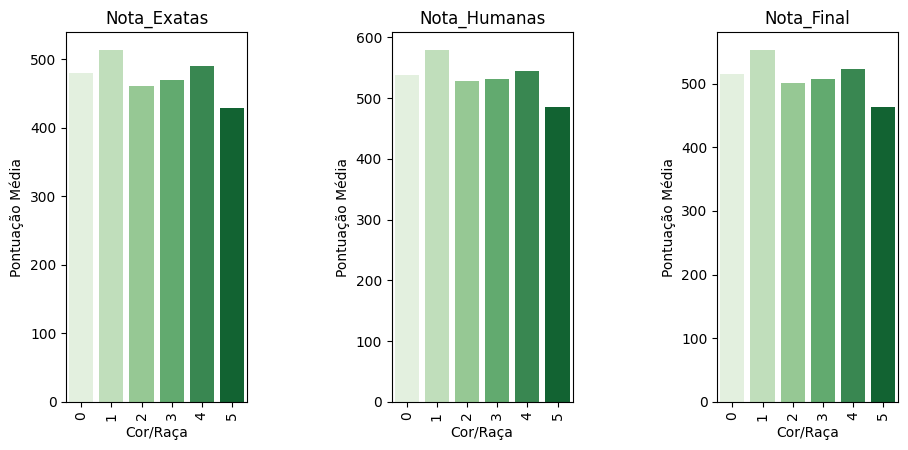

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)

for idx in range(3):
    plt.subplot(1,3, idx+1)
    cor_raca_df = df_final.groupby("Cor_Raca")[list(df_final.columns[-3:])[idx]].mean()
    sns.barplot(x = cor_raca_df.index, y = cor_raca_df.values, palette = "Greens")
    plt.xlabel("Cor/Raça")
    plt.ylabel("Pontuação Média")
    plt.xticks(rotation=90)
    plt.title(list(df_final.columns[-3:])[idx])

plt.show()

Agora vamos ver a perfomance por faixa etária, onde:



1.    Menor de 17 anos
2.    17 anos
3.    18 anos
4.    19 anos
5.    20 anos
6.    21 anos
7.    22 anos
8.    23 anos
9.    24 anos
10.   25 anos
11.   Entre 26 e 30 anos
12.   Entre 31 e 35 anos
13.   Entre 36 e 40 anos
14.   Entre 41 e 45 anos
15.   Entre 46 e 50 anos
16.   Entre 51 e 55 anos
17.   Entre 56 e 60 anos
18.   Entre 61 e 65 anos
19.   Entre 66 e 70 anos
20.   Maior de 70 anos




<ipython-input-21-8373deca5bff>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


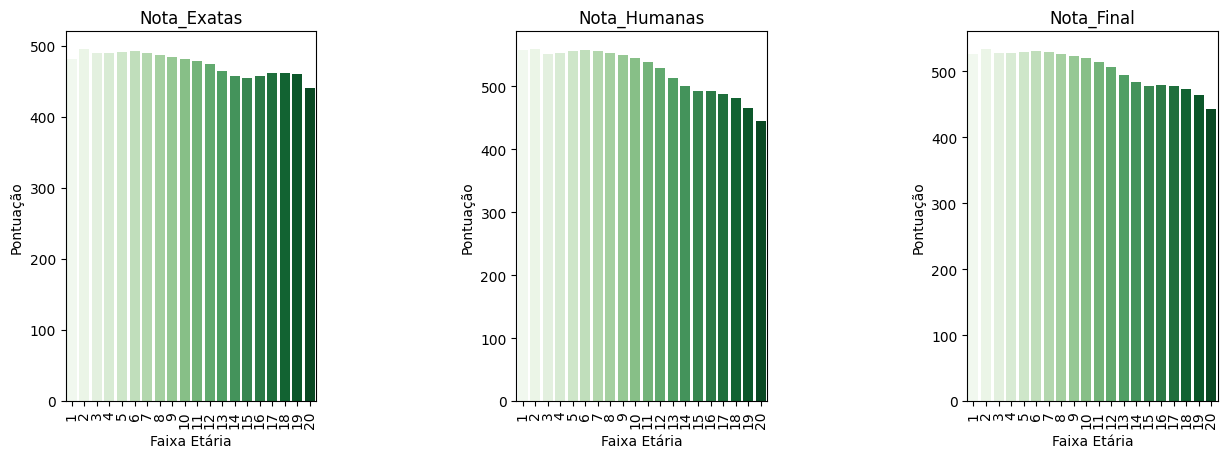

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 2.0)

for idx in range(3):
    plt.subplot(1,3, idx+1)
    idade_df = df_final.groupby("Faixa_Etaria")[list(df_final.columns[-3:])[idx]].mean()
    sns.barplot(x = idade_df.index, y = idade_df.values, palette = "Greens")
    plt.xlabel("Faixa Etária")
    plt.ylabel("Pontuação")
    plt.xticks(rotation=90)
    plt.title(list(df_final.columns[-3:])[idx])

plt.show()

Fica claro que a Cor/Raça do candidato não diz nada sobre sua performance, mas podemos notar uma tendência ao anlisarmos a Faixa Etária. Há uma queda na performance dos candidatos mais velhos.

Vamos ver os resultados com base na conclusão do Ensino Médio, onde:

1.   Ensino Médio concluído
2.   Cursando com conclusão em 2022
3.   Cursando com conclusão após 2022
4.   Não possui Ensino Médio


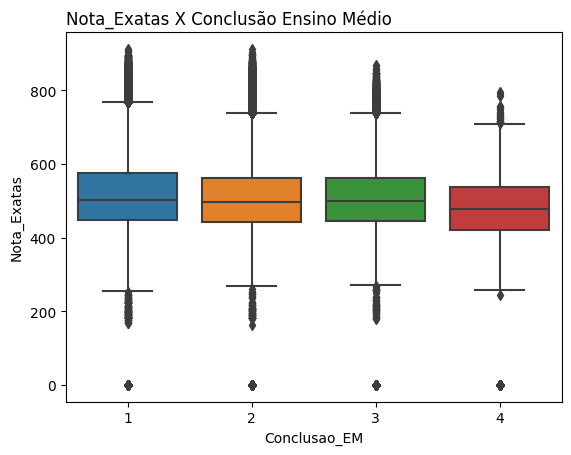

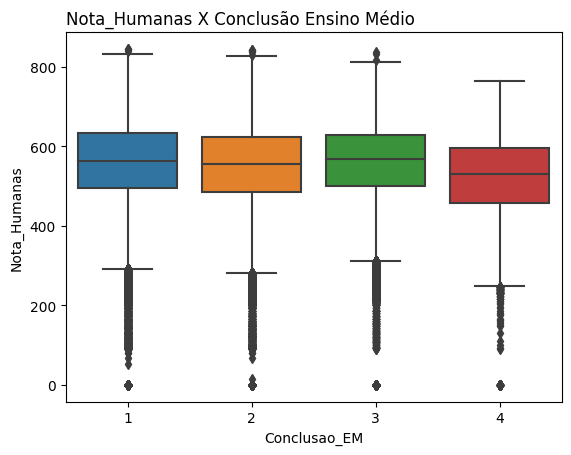

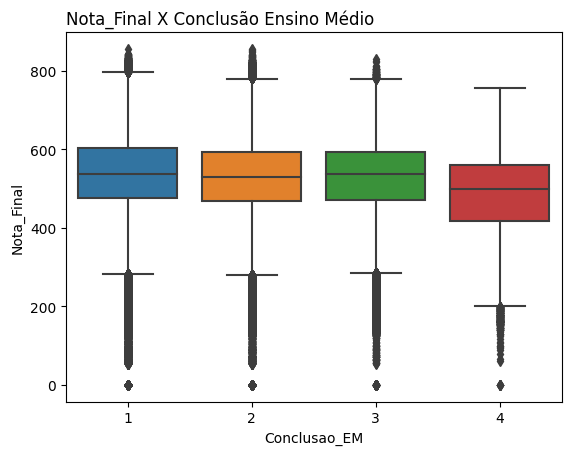

In [ ]:
for item in df_final.columns[-3:]:
  sns.boxplot(x = df_final["Conclusao_EM"], y = df_final[item])
  plt.title(item + " X Conclusão Ensino Médio", loc = "left")
  plt.show()

Apesar de haverem muitos outliers, a distribuição das notas fica mais próxima se os candidatos completaram ou estão cursando o Ensino Médio.

Vamos fazer o mesmo comparativo com o Tipo de escola do Ensino Médio, onde:


1.   Não informado
2.   Pública
3.   Privada

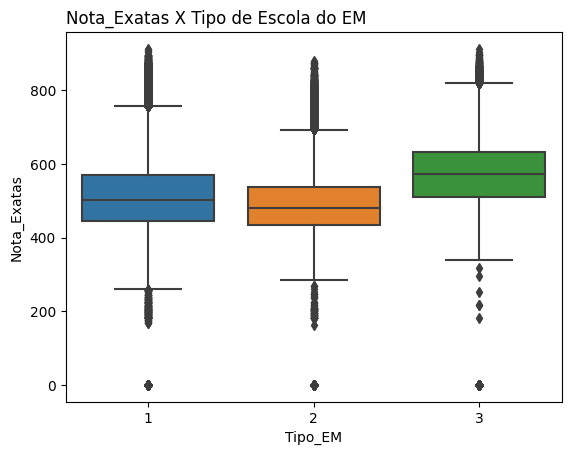

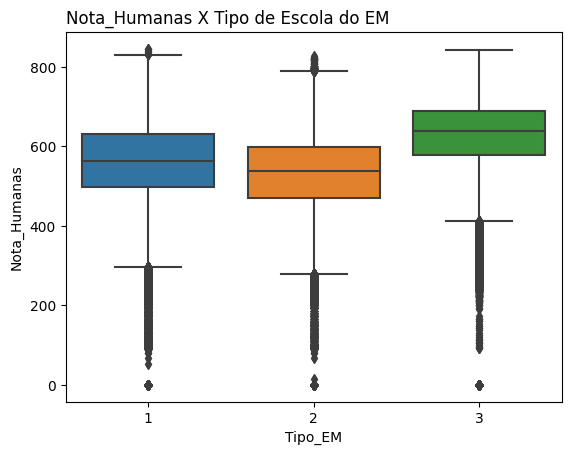

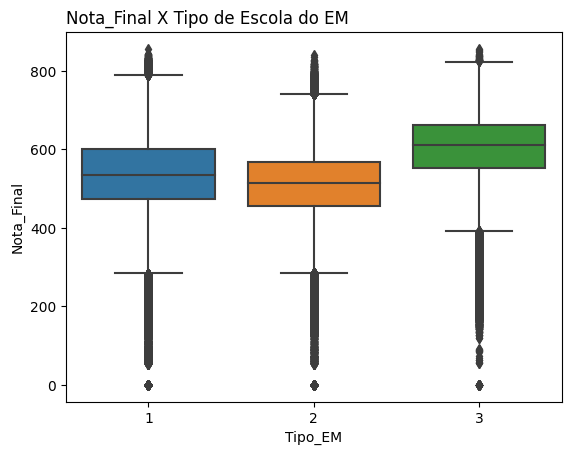

In [ ]:
for item in df_final.columns[-3:]:
  sns.boxplot(x = df_final["Tipo_EM"], y = df_final[item])
  plt.title(item + " X Tipo de Escola do EM", loc = "left")
  plt.show()

Vemos uma clara vantagem dos estudantes de escolas privadas.

Como todas as nossas variáveis são numéricas, podemos usar o algoritmo KMeans para classificar o dataset sem a necessidade de nenhum tratamento adicional.

## 4 - Aplicação do K-Means

Primeiro, vamos verificar os tipos de dados no dataset:

In [ ]:
df_final.dtypes

ID_Candidato           int64
Faixa_Etaria           int64
Cor_Raca               int64
Conclusao_EM           int64
Tipo_EM                int64
Tipo_Conclusao_EM    float64
Nota_CN              float64
Nota_CH              float64
Nota_LC              float64
Nota_Matematica      float64
Nota_Redacao         float64
Q001                  object
Q002                  object
Q005                   int64
Q006                  object
Q024                  object
Q025                  object
Nota_Exatas          float64
Nota_Humanas         float64
Nota_Final           float64
dtype: object

Para a aplicação do K-Means, precisamos que todos os dados sejam do tipo numérico. Vamos fazer uma cópia do dataset para trabalharmos com o algoritmo e transformar os dados necessários.

In [ ]:
train_df = df_final.copy()

def label_encoding_index_1(column):
  le = LabelEncoder()
  labels = le.fit_transform(column) + 1
  return labels

columns_to_encode = ["Q001", "Q002", "Q006", "Q024", "Q025"]

for column in columns_to_encode:
  train_df[column] = label_encoding_index_1(train_df[column])

train_df.head()

,ID_Candidato,Faixa_Etaria,Cor_Raca,Conclusao_EM,Tipo_EM,Tipo_Conclusao_EM,Nota_CN,Nota_CH,Nota_LC,Nota_Matematica,Nota_Redacao,Q001,Q002,Q005,Q006,Q024,Q025,Nota_Exatas,Nota_Humanas,Nota_Final
0,210057280536,5,2,1,1,1.0,421.1,546.0,498.8,565.3,760.0,5,6,2,2,1,2,493.2,601.6,558.2
1,210055724397,6,3,1,1,1.0,490.7,388.6,357.8,416.0,320.0,3,1,3,1,2,2,453.4,355.5,394.6
2,210055778089,6,2,1,1,1.0,398.1,427.3,400.2,404.9,440.0,5,5,5,2,1,2,401.5,422.5,414.1
3,210055461467,4,3,1,1,1.0,467.5,461.0,466.7,435.3,360.0,5,5,2,2,1,2,451.4,429.2,438.1
4,210054972570,2,1,2,3,1.0,458.7,539.8,488.2,456.8,940.0,5,5,4,2,1,2,457.8,656.0,576.7


Agora que todas as variáveis são numéricas, podemos usar o algoritmo K-Means para classificar o dataset. Para isso utilizaremos "Método do Cotovelo", que é um processo que busca encontrar o número ideal de clusters.

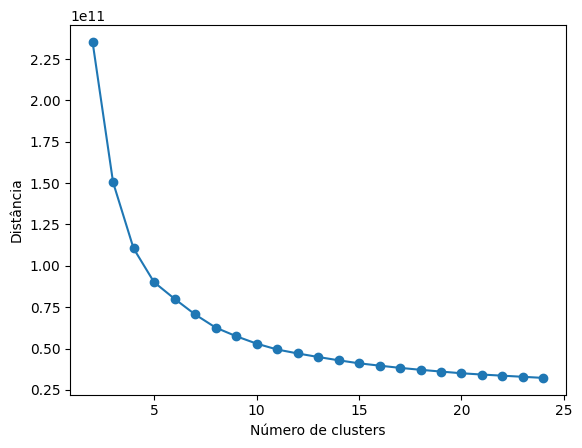

In [ ]:
kmeans_dis = list()

for idx in range(2, 25):
  kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
  kmeans.fit_transform(train_df.iloc[:, 1:])
  kmeans_dis.append(kmeans.inertia_)

plt.plot(list(range(2, 25)), kmeans_dis, marker = 'o')
plt.xlabel("Número de clusters")
plt.ylabel("Distância")
plt.show()

O gráfico acima demonstra a curva gerada pelo processo e a idéia é encotrarmos o "cotovelo" ou o ponto onde o aumento do número de clusters deixa de demonstrar uma discrepância significativa na distância. Vamos escolher 8 como o cotovelo (quantidade de clusters), depois classificamos todos os dados.

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
train_df["Classificacao"] = kmeans_label
train_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID_Candidato,Faixa_Etaria,Cor_Raca,Conclusao_EM,Tipo_EM,Tipo_Conclusao_EM,Nota_CN,Nota_CH,Nota_LC,Nota_Matematica,...,Q001,Q002,Q005,Q006,Q024,Q025,Nota_Exatas,Nota_Humanas,Nota_Final,Classificacao
0,210057280536,5,2,1,1,1.0,421.1,546.0,498.8,565.3,...,5,6,2,2,1,2,493.2,601.6,558.2,5
1,210055724397,6,3,1,1,1.0,490.7,388.6,357.8,416.0,...,3,1,3,1,2,2,453.4,355.5,394.6,4
2,210055778089,6,2,1,1,1.0,398.1,427.3,400.2,404.9,...,5,5,5,2,1,2,401.5,422.5,414.1,4
3,210055461467,4,3,1,1,1.0,467.5,461.0,466.7,435.3,...,5,5,2,2,1,2,451.4,429.2,438.1,4
4,210054972570,2,1,2,3,1.0,458.7,539.8,488.2,456.8,...,5,5,4,2,1,2,457.8,656.0,576.7,5
5,210056065100,2,3,3,1,1.0,396.8,528.7,551.4,536.0,...,7,6,2,2,2,2,466.4,573.4,530.6,1
6,210057551883,8,2,1,1,1.0,481.4,603.6,589.0,695.0,...,2,6,6,2,1,2,588.2,684.2,645.8,0
7,210055739197,1,3,3,1,1.0,466.5,476.2,488.3,462.7,...,8,5,6,2,2,2,464.6,321.5,378.7,2
8,210056235859,4,1,1,1,1.0,493.8,498.2,527.0,343.0,...,2,4,2,2,2,2,418.4,555.1,500.4,1
9,210057706656,4,3,1,1,1.0,476.0,559.2,607.3,625.4,...,5,5,3,5,1,2,550.7,642.2,605.6,5


Agora vamos ver a performance de cada cluster:

In [ ]:
class_df = train_df.groupby(["Classificacao"])[train_df.columns[-4:-1]].mean()
class_df

,Nota_Exatas,Nota_Humanas,Nota_Final
Classificacao,,,
0,663.206533,699.820405,685.174912
1,461.844888,537.198033,507.056753
2,458.317686,273.027871,347.143517
3,0.161837,523.456843,314.138863
4,448.327779,446.961165,447.507861
5,528.093706,636.877334,593.363895
6,0.463804,297.926808,178.941411
7,564.202886,573.765159,569.940306


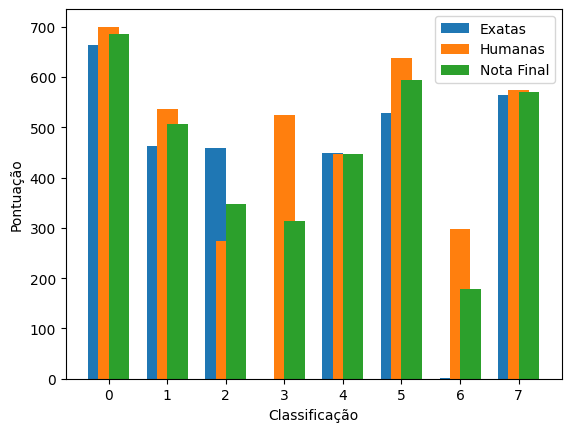

In [ ]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.Nota_Exatas, width, label="Exatas")
rects2 = ax.bar(ind, class_df.Nota_Humanas, width, label="Humanas")
rects3 = ax.bar(ind + width/2, class_df.Nota_Final, width, label="Nota Final")

ax.set_xlabel("Classificação")
ax.set_ylabel("Pontuação")
ax.set_xticks(ind)
ax.legend()
plt.show()

Até o momento, está claro que há uma tendência das notas nas disciplinas da categoria Humanas serem maior que da categoria Exatas. Mas vamos escolher a Nota Final (que é a média aritimética de todo o conteúdo) para realizar o ranking dos clusters:

In [ ]:
rank = class_df["Nota_Final"].sort_values(ascending = False)
rank.index

Int64Index([0, 5, 7, 1, 4, 2, 3, 6], dtype='int64', name='Classificacao')

In [ ]:
rank

Classificacao
0    685.174912
5    593.363895
7    569.940306
1    507.056753
4    447.507861
2    347.143517
3    314.138863
6    178.941411
Name: Nota_Final, dtype: float64

## 5 - Análise do K-Means

A partir de agora, podemos achar a correlação entre a performance dos alunos. Vamos exibir em gráficos de pizza para ver se a conclusão do Ensino Médio pode afetar a performance ou não.

<ipython-input-130-14c661aedd55>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, idx+1)


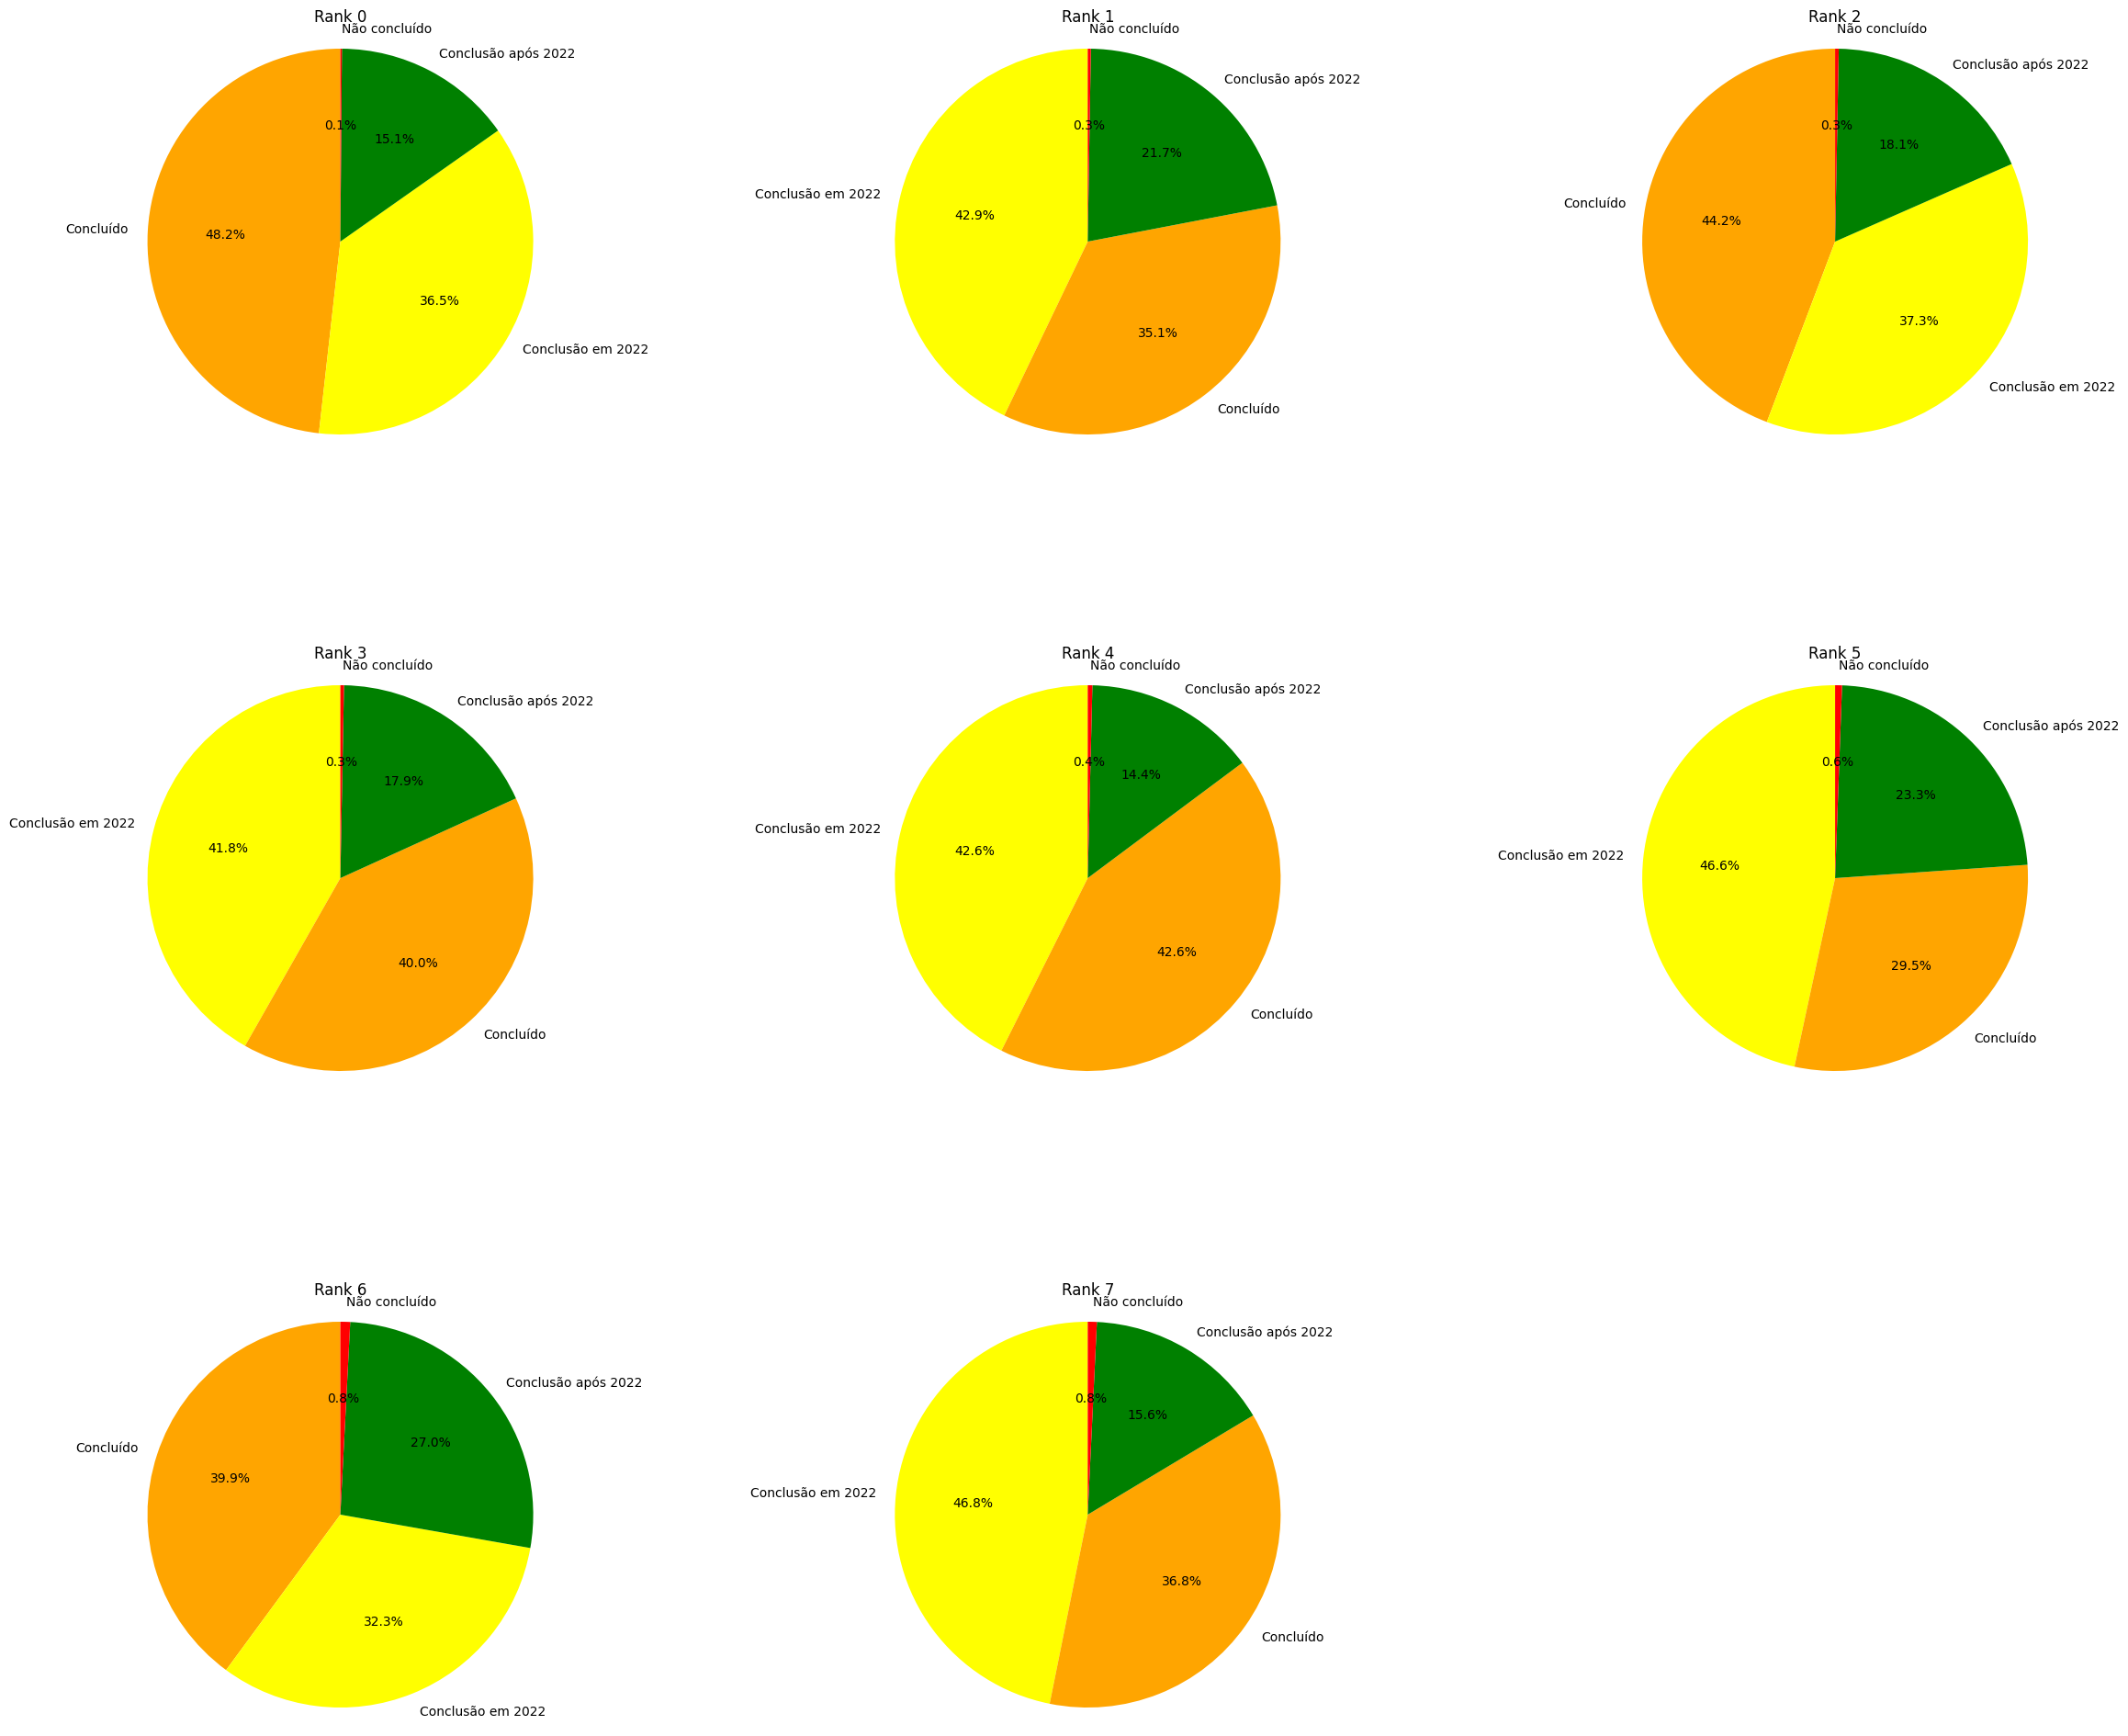

In [ ]:
def plot_pie_chart(column, label_mapping, colors_mapping):
    fig, ax = plt.subplots(figsize=(28,24))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class" + str(idx)
        num = train_df[train_df["Classificacao"] == rank.index[idx]]
        percent_coluna = num[column].value_counts()
        percent_coluna.sort_index()
        label = percent_coluna.index
        value = percent_coluna.values
        label = [label_mapping.get(num, num) for num in label]
        colors = [colors_mapping.get(var, 'blue') for var in label]
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = colors[:len(label)])
        plt.axis("equal")
        plt.title("Rank " + str(idx))
    plt.show()


label_mapping_conclusao_em = {1:"Concluído",
                              2:"Conclusão em 2022",
                              3:"Conclusão após 2022",
                              4:"Não concluído"}

color_mapping_conclusao_em = {"Concluído":"orange",
                              "Conclusão em 2022":"yellow",
                              "Conclusão após 2022":"green",
                              "Não concluído":"red"}

plot_pie_chart("Conclusao_EM", label_mapping_conclusao_em, color_mapping_conclusao_em)

Podemos ver claramente que os candidatos que já concluíram o Ensino Médio, ou estavam concluíndo no mesmo ano do Exame são os melhores rankeados, isso faz sentido pois estavam estudando o conteúdo da prova em seu dia a dia.

Uma outra informação que fica clara é que cursar o Ensino Médio é essencial para obter um resultado satisfatório no Exame.

Com esse fato estabelecido, vamos verificar o quanto o tipo de instituição de ensino onde o Ensino Médio foi cursado pode impactar nos resultados:

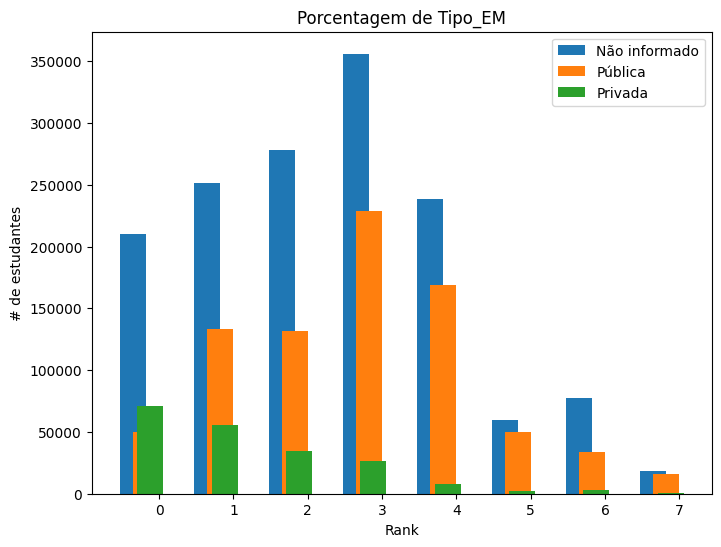

In [ ]:
def plot_bar_chart(column, label_mapping):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class" + str(idx)
        num = train_df[train_df["Classificacao"] == rank.index[idx]]
        porcent_da_coluna = num[column].value_counts()
        porcent_da_coluna = porcent_da_coluna.sort_index()
        for key in porcent_da_coluna.index:
          if key not in index_dict.keys():
            index_dict[key] = []
            index_dict[key].append(porcent_da_coluna[key])
          else:
            index_dict[key].append(porcent_da_coluna[key])
    porcent_da_coluna = train_df[train_df["Classificacao"] == rank.index[4]][column].value_counts().sort_index()
    for i in range(len(porcent_da_coluna.index)):
      rects = ax.bar(ind - width / (i + 1), index_dict[porcent_da_coluna.index[i]], width, label=label_mapping[porcent_da_coluna.index[i]])

    ax.set_xlabel("Rank")
    ax.set_ylabel("# de estudantes")
    ax.set_title("Porcentagem de " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()

label_mapping_tipo_em = {
        1:"Não informado",
        2:"Pública",
        3:"Privada"
    }

plot_bar_chart("Tipo_EM", label_mapping_tipo_em)

Podemos ver uma tendência de melhor desempenho para os candidatos que cursaram o Ensino Médio em uma instituição pública, mas como uma quantidade expressiva de candidados que não deu essa informação, o resultado pode estar sendo afetado por isso. Vamos fazer o mesmo comparativo com outra variável:

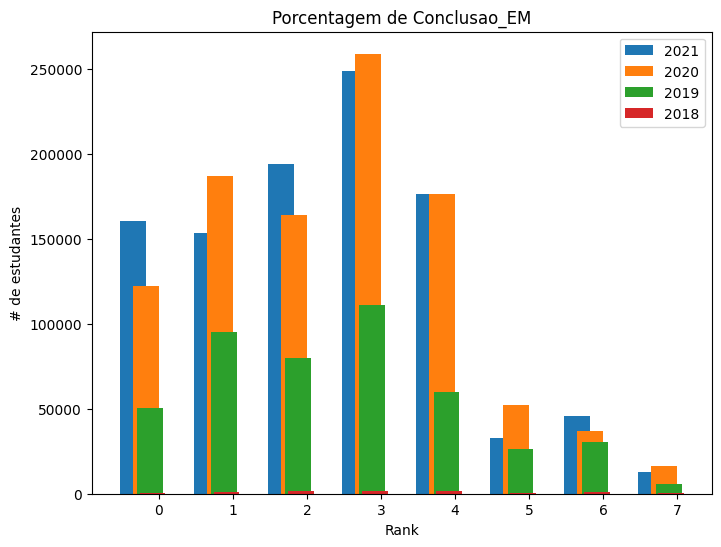

In [ ]:
label_mapping_tipo_ensino_em = {
        0:"Não informado",
        1:"2021",
        2:"2020",
        3:"2019",
        4:"2018",
        5:"2017",
        6:"2016",
        7:"2015",
        8:"2014",
        9:"2013",
        10:"2012",
        11:"2011",
        12:"2010",
        13:"2009",
        14:"2008",
        15:"2007",
        16:"Antes de 2007"
    }

plot_bar_chart("Conclusao_EM", label_mapping_tipo_ensino_em)

Podemos ver uma tendência de melhor resultado em candidatos que concluíram o Ensino Médio recentemente. Candidatos que concluíram o Ensino Médio há mais de 2 anos começam a apresentar uma clara queda de desempenho. Esse dado corrobora com a ideia de que os candidatos que estão estudando o conteúdo do exame em seu dia a dia possuem melhores resultados.

Agora vamos verificar se as questões socioeconômicas que separamos na etapa de tratamento de dados. Vamos começar utilizando o mesmo gráfico de pizzas anterior pra as questões Q001 e Q002, que correspondem ao nível de escolaridade dos responsaveis pelos candidatos:

A fim de facilitar a leitura dos gráficos, para essas duas variáveis vamos considerar que:

>Ensino Fundamental 1 = 1º Ano até 5º Ano do Ensino Fundamental.
>
>Ensino Fundamental 2 = 6º Ano até 9º Ano do Ensino Fundamental.



*   Q001 - Nível de escolaridade do pai, ou homem responsável.


<ipython-input-130-14c661aedd55>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, idx+1)


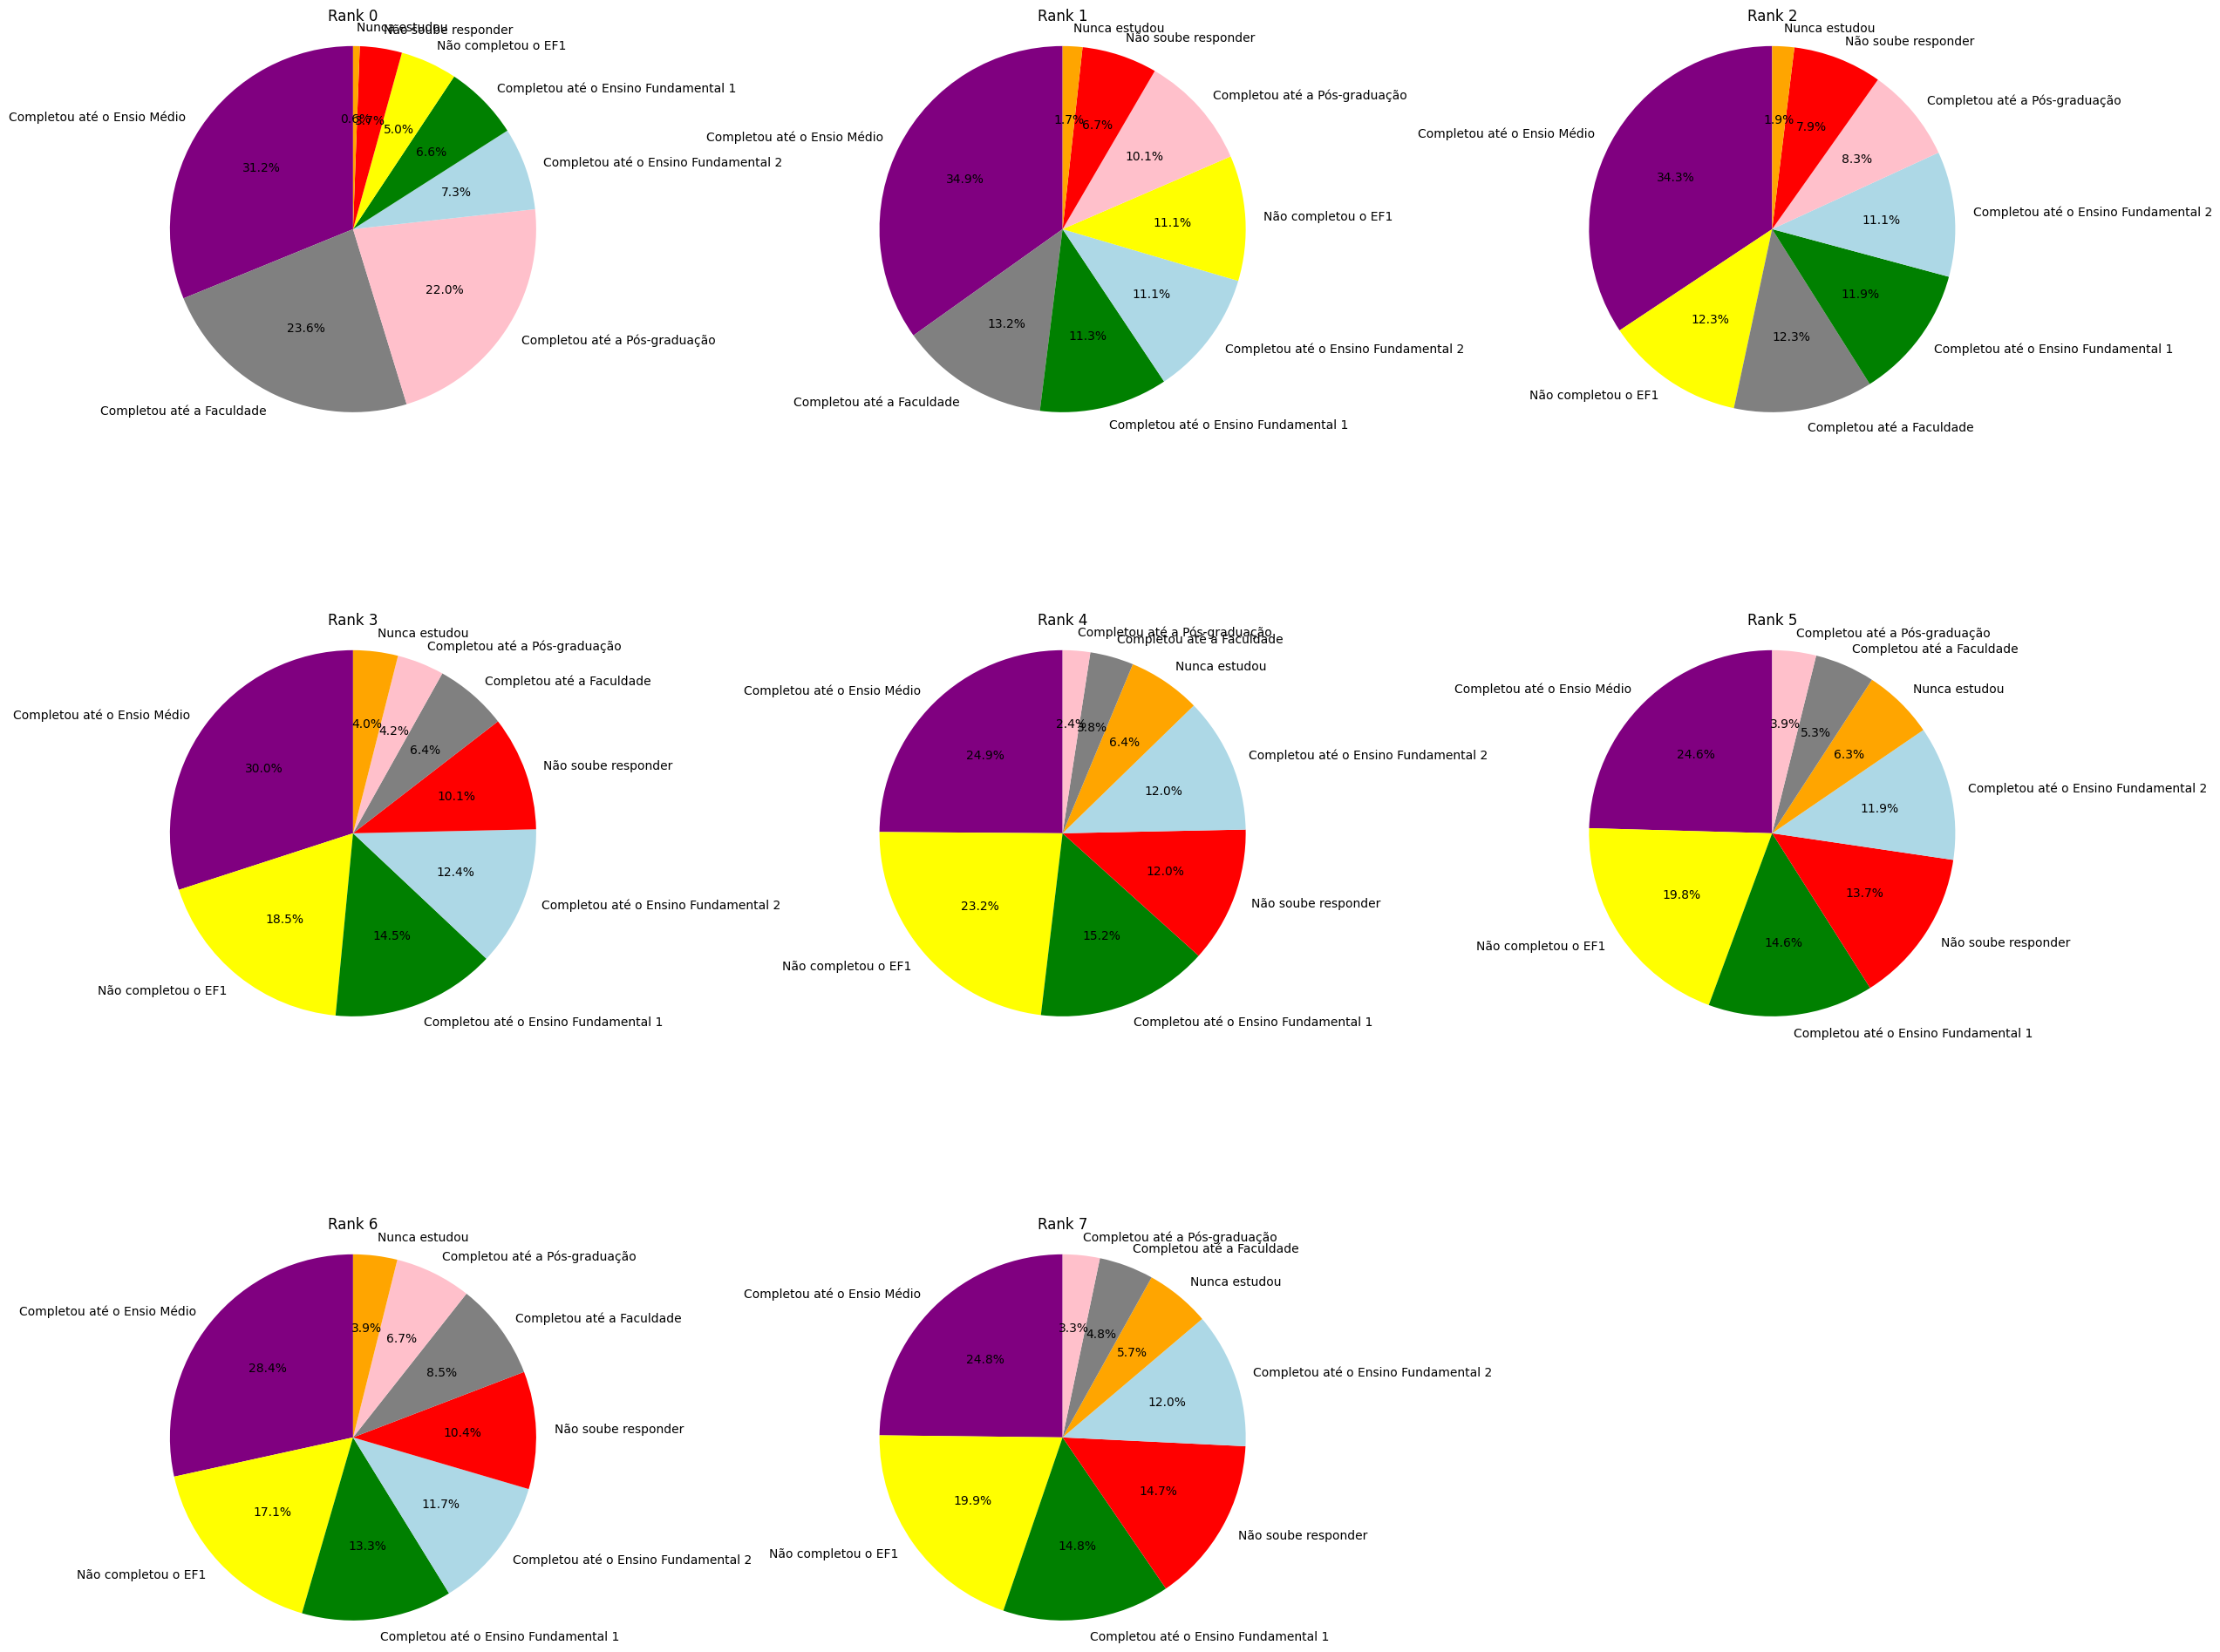

In [ ]:
label_mapping_conclusao_em = {1:"Nunca estudou",
                              2:"Não completou o EF1",
                              3:"Completou até o Ensino Fundamental 1",
                              4:"Completou até o Ensino Fundamental 2",
                              5:"Completou até o Ensio Médio",
                              6:"Completou até a Faculdade",
                              7:"Completou até a Pós-graduação",
                              8:"Não soube responder"}

color_mapping_conclusao_em = {"Nunca estudou":"orange",
                              "Não completou o EF1":"yellow",
                              "Completou até o Ensino Fundamental 1":"green",
                              "Completou até o Ensino Fundamental 2":"lightblue",
                              "Completou até o Ensio Médio":"purple",
                              "Completou até a Faculdade":"grey",
                              "Completou até a Pós-graduação":"pink",
                              "Não soube responder":"red"}

plot_pie_chart("Q001", label_mapping_conclusao_em, color_mapping_conclusao_em)

*   Q002 - Nível de escolaridade da mãe, ou mulher responsável.

<ipython-input-130-14c661aedd55>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, idx+1)


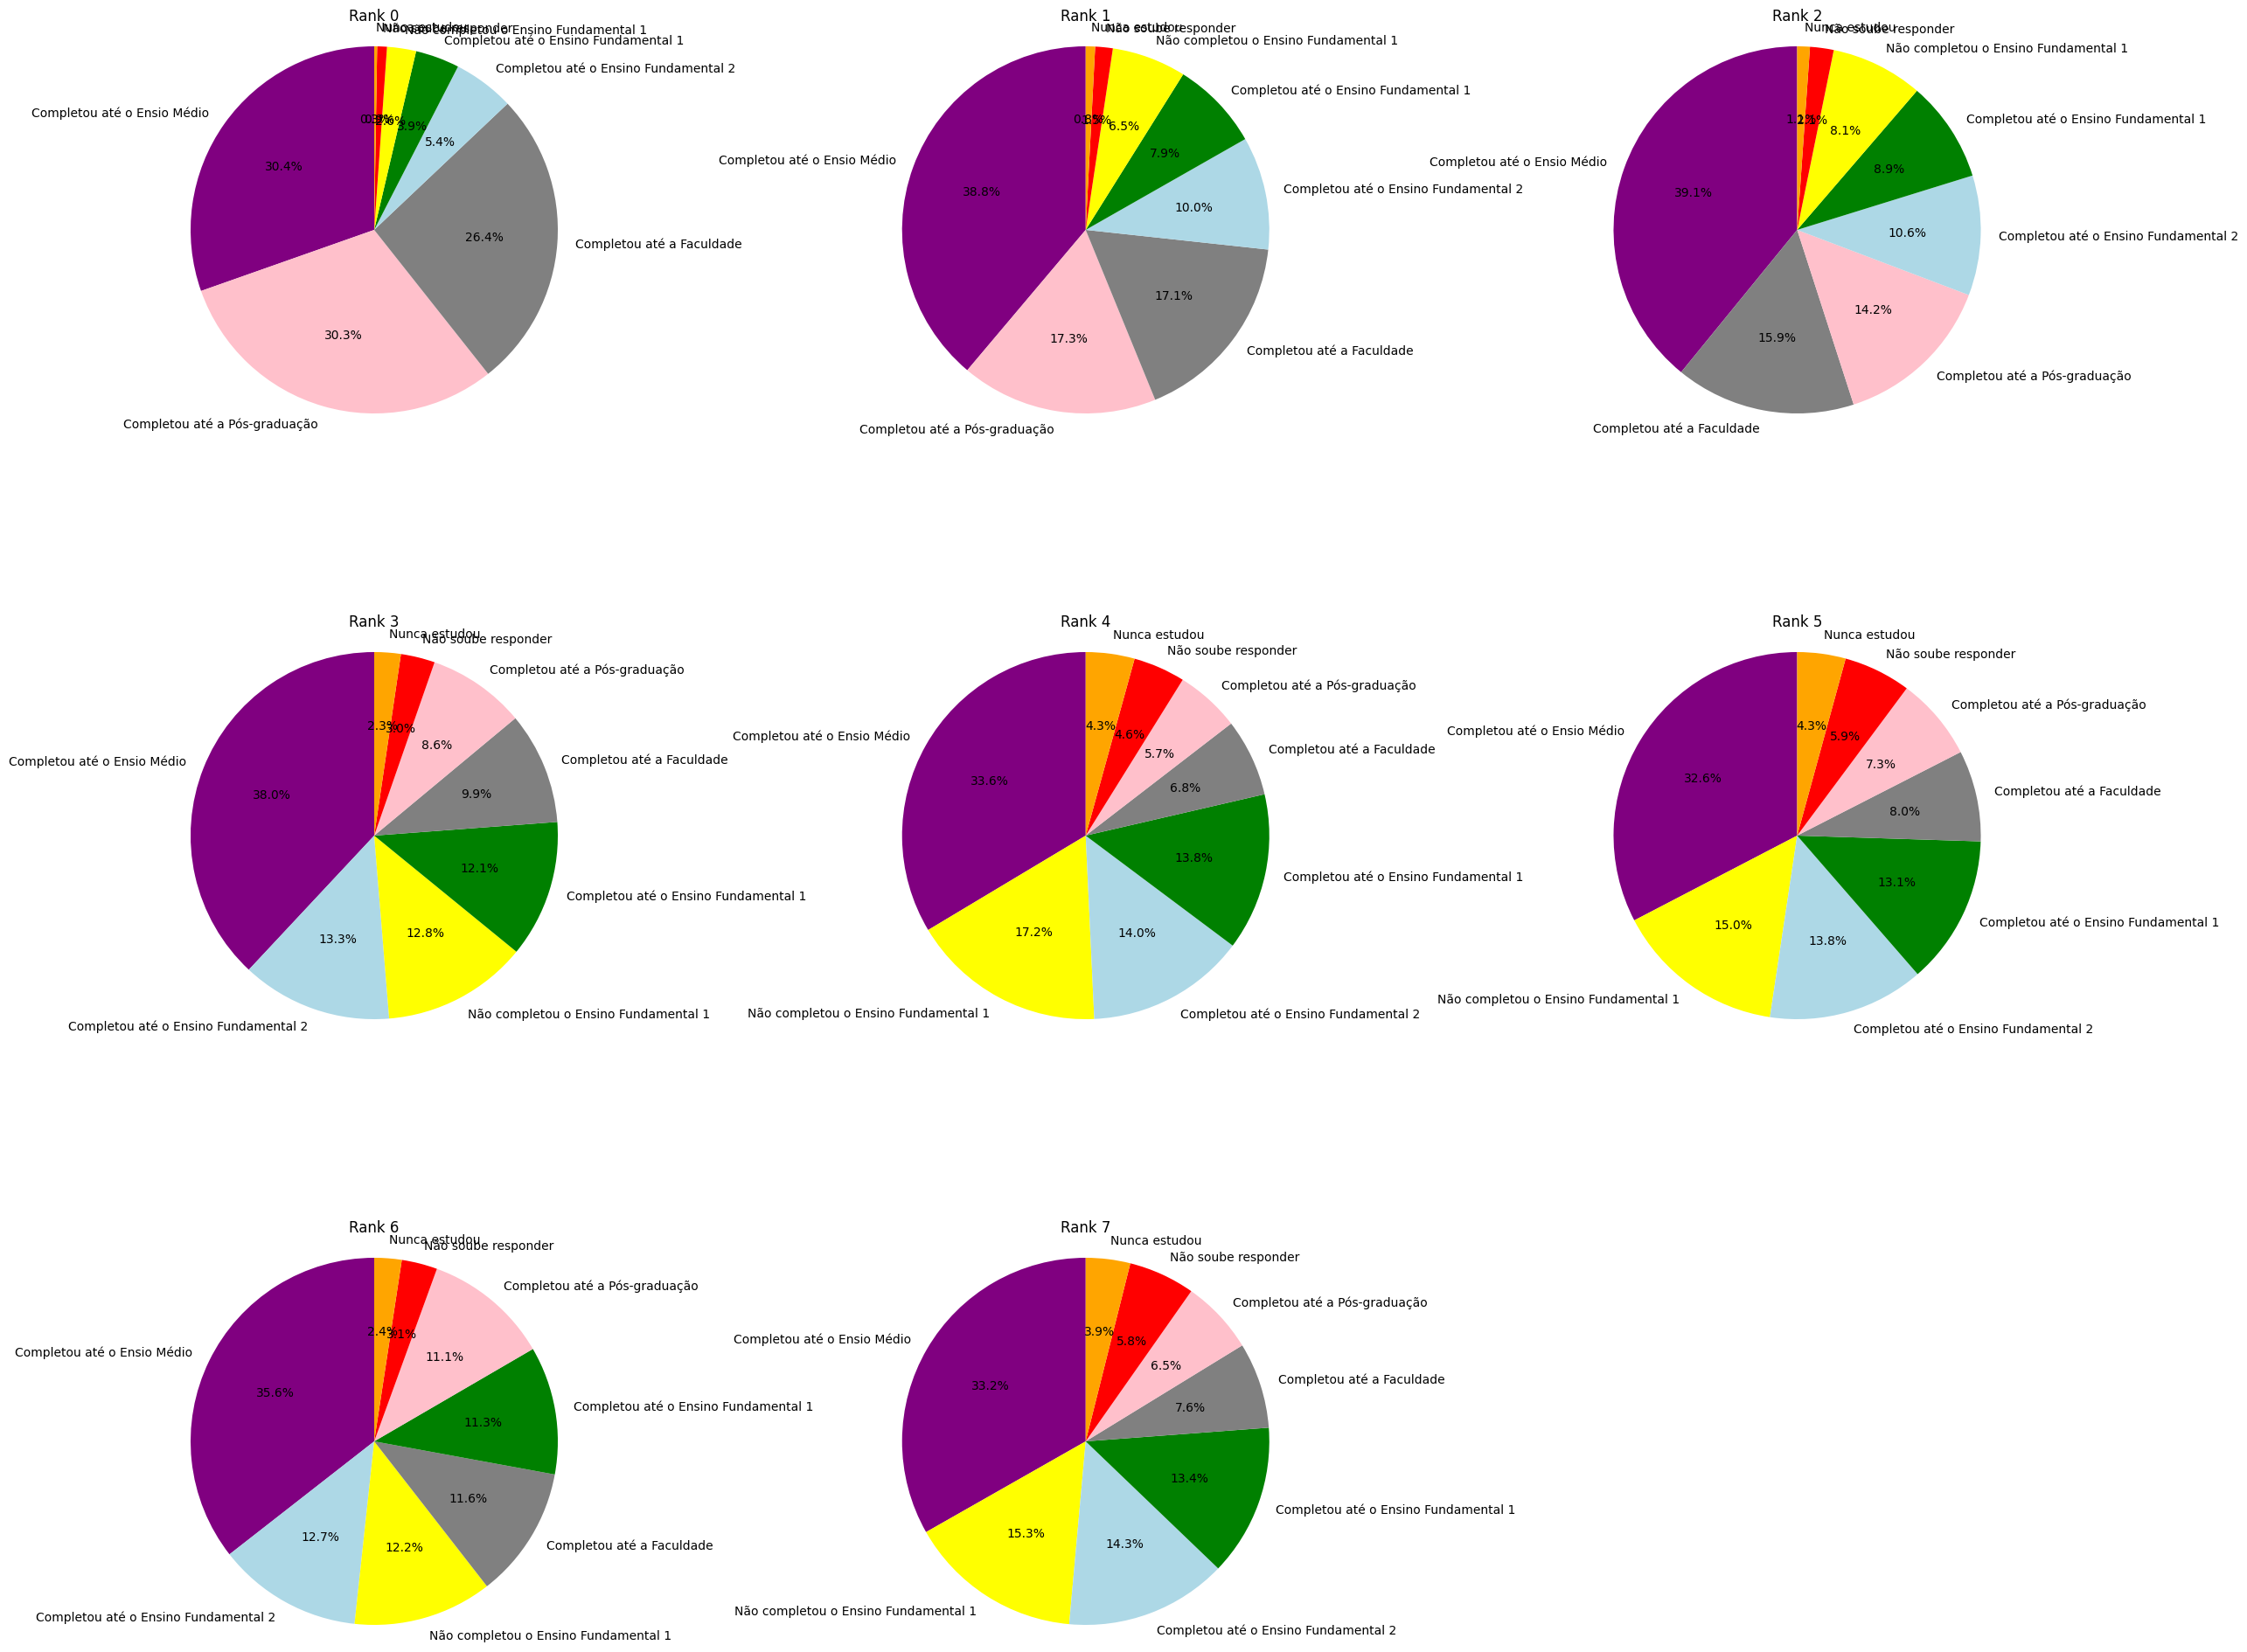

In [ ]:
label_mapping_conclusao_em = {1:"Nunca estudou",
                              2:"Não completou o Ensino Fundamental 1",
                              3:"Completou até o Ensino Fundamental 1",
                              4:"Completou até o Ensino Fundamental 2",
                              5:"Completou até o Ensio Médio",
                              6:"Completou até a Faculdade",
                              7:"Completou até a Pós-graduação",
                              8:"Não soube responder"}

color_mapping_conclusao_em = {"Nunca estudou":"orange",
                              "Não completou o Ensino Fundamental 1":"yellow",
                              "Completou até o Ensino Fundamental 1":"green",
                              "Completou até o Ensino Fundamental 2":"lightblue",
                              "Completou até o Ensio Médio":"purple",
                              "Completou até a Faculdade":"grey",
                              "Completou até a Pós-graduação":"pink",
                              "Não soube responder":"red"}

plot_pie_chart("Q002", label_mapping_conclusao_em, color_mapping_conclusao_em)

Comparando os resultados das variáveis, podemos notar algumas tendências:


*   O nível de educação dos responsáveis parece influenciar no resultado dos candidatos, pois o rank 0 poussui o maior índice de responsáveis com Ensino Médio e Ensino Superior (Faculdade e Pós-graduação) completos. Somando, temos aproximadamente 70% dos responsáveis nesse status no rank 0, que é o rank onde os candidatos obtiveram o melhor desempenho no Exame.
*   Em contrapartida ao item anterior, os ranks 3 e 6, que apresentam o pior desempenho, também apresentam o maior índice de responsáveis que não chegaram a concluir o Ensino Médio. Somando, temos aproximadamente 48% dos pais (ou responsável homem) e 40% das mães (ou responsável mulher) nessa faixa.



Vamos chegar se a Renda familiar influencia no resultado:

<ipython-input-139-3f9b042ebe19>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, idx + 1)
<ipython-input-139-3f9b042ebe19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[column] = num[column].map(group_mapping)
<ipython-input-139-3f9b042ebe19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[column] = num[column].map(group_mapping)
<ipython-input-139-

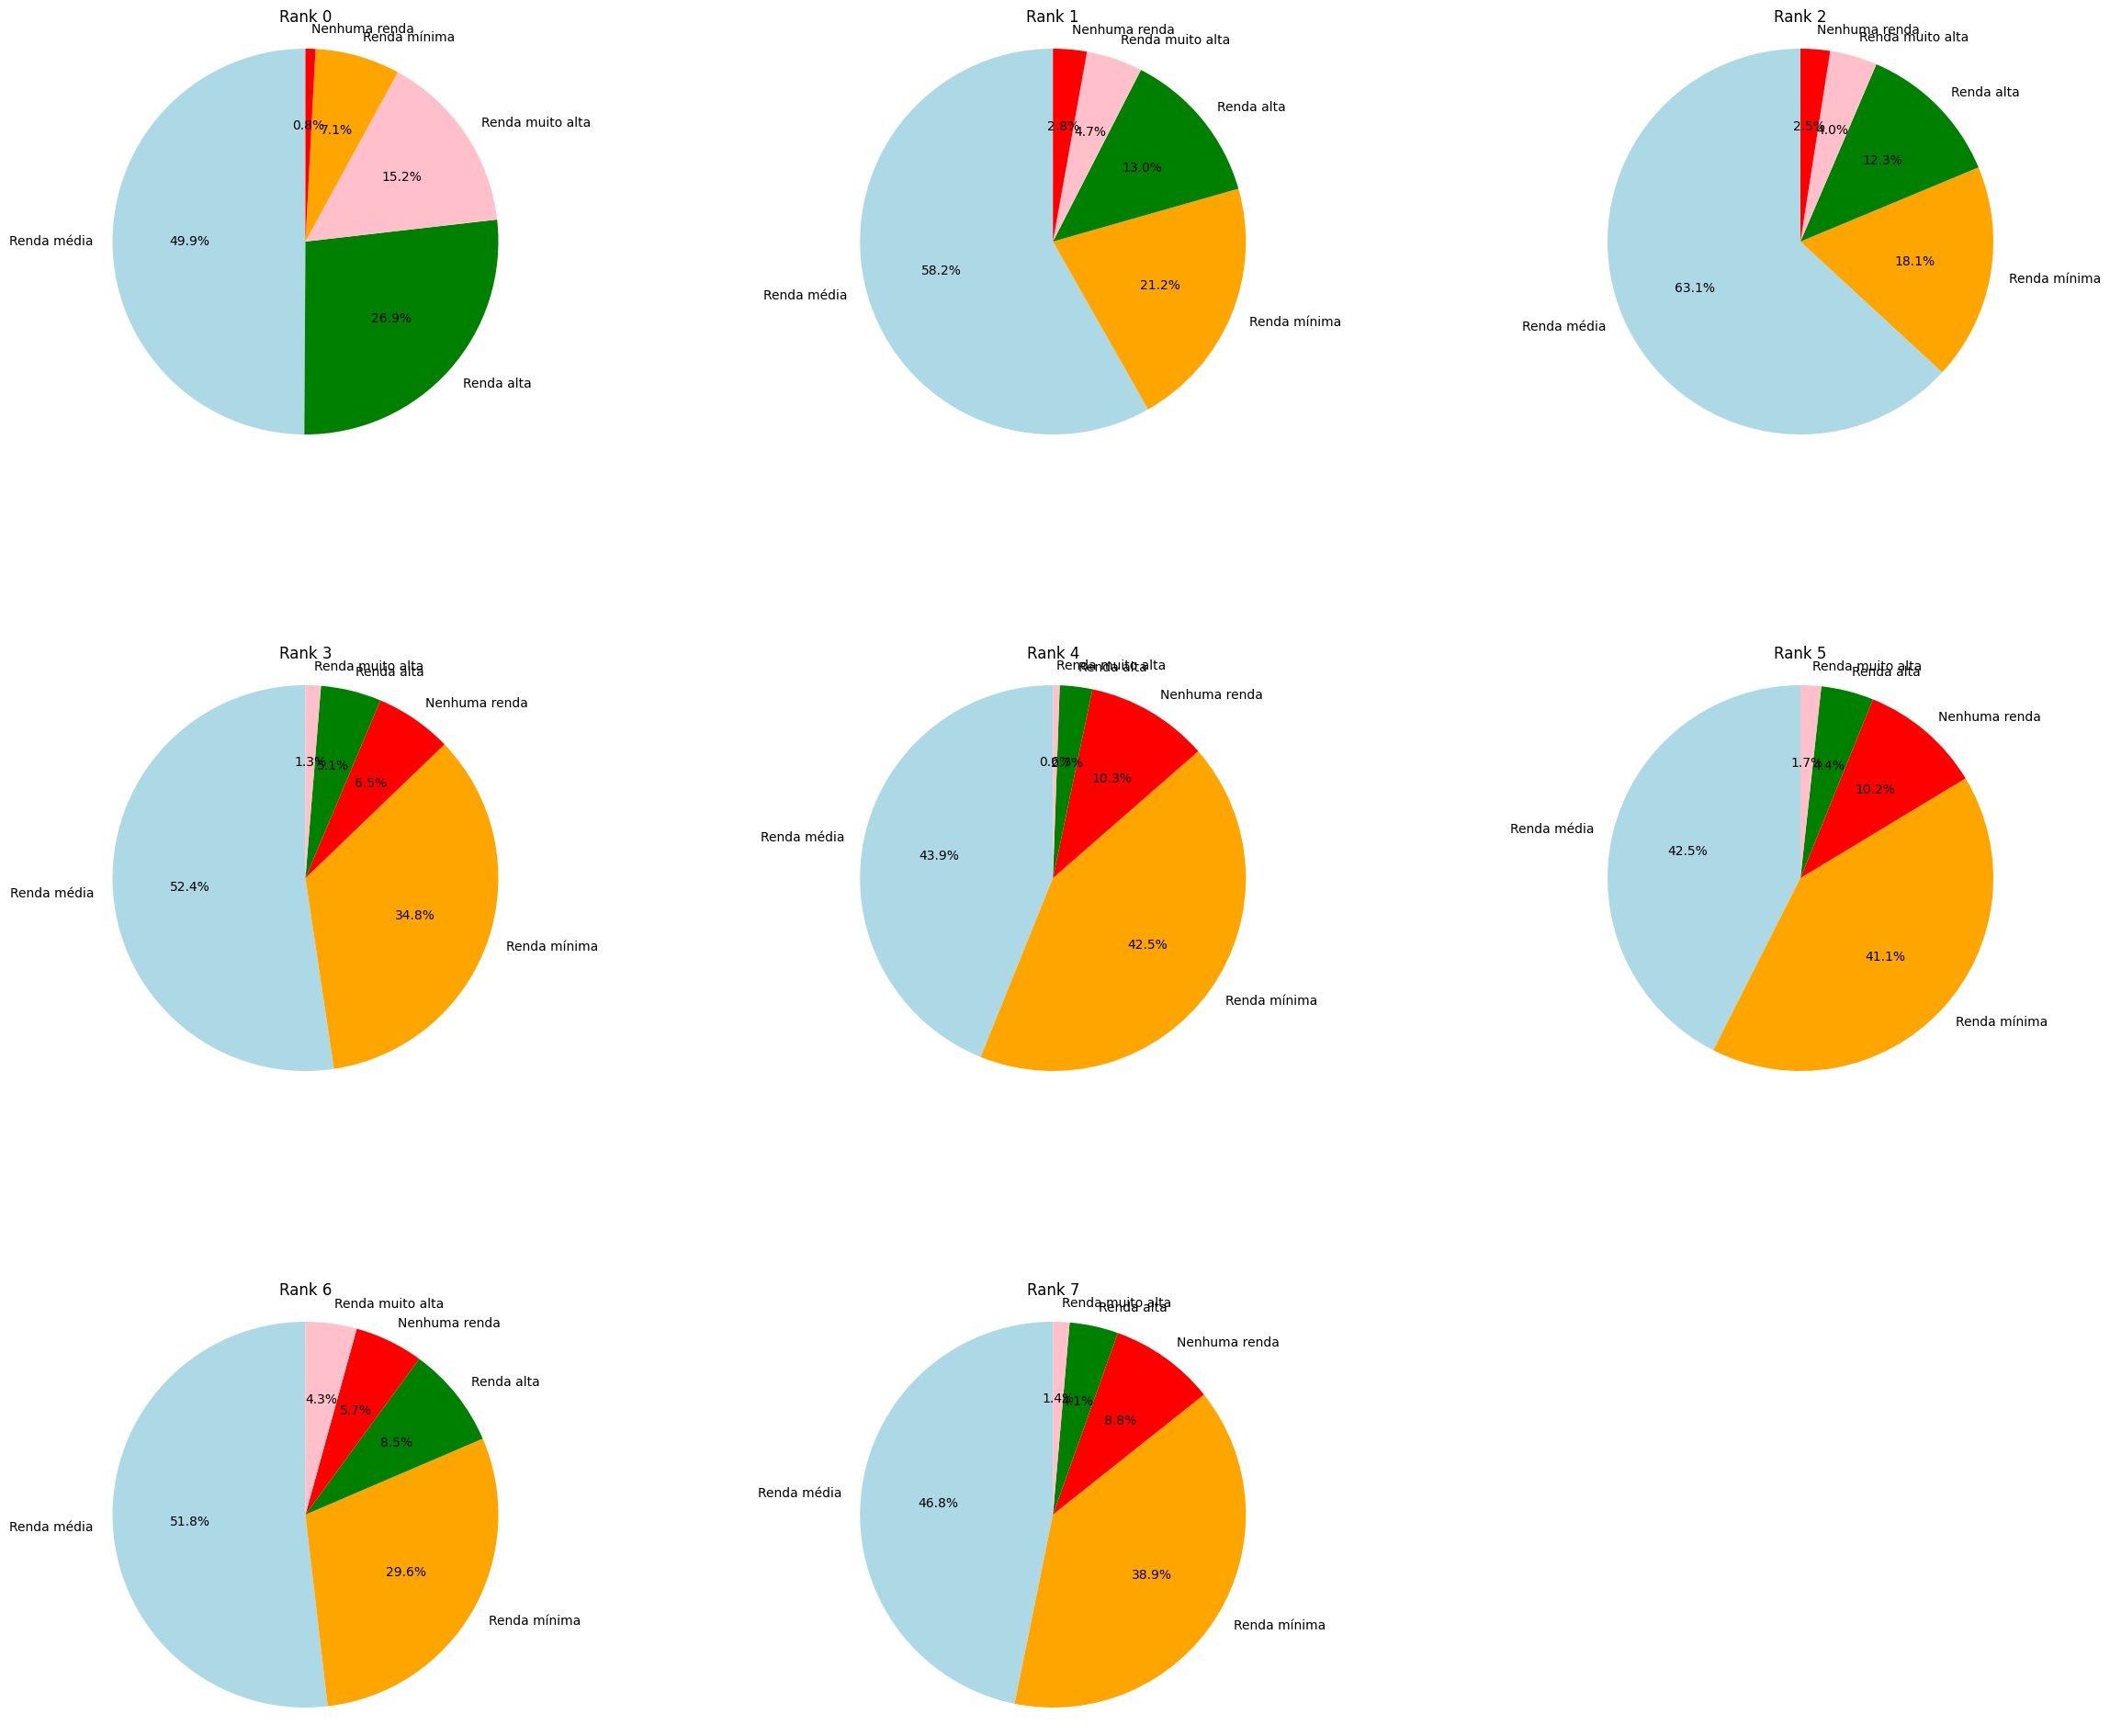

In [ ]:
def group_and_plot_pie_chart(column, label_mapping, colors_mapping, group_mapping):
    fig, ax = plt.subplots(figsize=(28, 24))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for idx in range(8):
        plt.subplot(3, 3, idx + 1)
        num = "class" + str(idx)
        num = train_df[train_df["Classificacao"] == rank.index[idx]]

        #agrupar os dados
        num[column] = num[column].map(group_mapping)
        percent_coluna = num[column].value_counts()
        percent_coluna.sort_index()

        label = percent_coluna.index
        value = percent_coluna.values

        label = [label_mapping.get(num, num) for num in label]
        colors = [colors_mapping.get(var, 'blue') for var in label]

        plt.pie(value, labels=label, autopct="%1.1f%%",
                startangle=90, radius=4, colors=colors[:len(label)])

        plt.axis("equal")
        plt.title("Rank " + str(idx))

    plt.show()

def group_renda(renda):
    if renda in [1]:
        return "Nenhuma renda"
    elif renda in [2,]:
        return "Renda mínima"
    elif renda in [3, 4]:
        return "Renda média"
    elif renda in [5, 6, 7, 8]:
        return "Renda média"
    elif renda in [9, 10, 11, 12, 13, 14]:
        return "Renda alta"
    else:
        return "Renda muito alta"

label_mapping_renda = {"Nenhuma renda": "Nenhuma renda",
                       "Renda mínima": "Renda mínima",
                       "Renda baixa": "Renda baixa",
                       "Renda média": "Renda média",
                       "Renda alta": "Renda alta",
                       "Renda muito alta": "Renda muito alta"}

color_mapping_renda = {"Nenhuma renda": "red",
                       "Renda mínima": "orange",
                       "Renda baixa": "yellow",
                       "Renda média": "lightblue",
                       "Renda alta": "green",
                       "Renda muito alta": "pink"}

# Chame a função com a coluna, mapeamento de labels, mapeamento de cores e a função de agrupamento
group_and_plot_pie_chart("Q006", label_mapping_renda, color_mapping_renda, group_renda)

O agrupamento da renda familiar não parece influenciar diretamente no desempenho dos candidatos.

## 6 - Aplicação da Árvore de Decisão

In [ ]:
tree_df = train_df.copy()

tree_df.dtypes

ID_Candidato           int64
Faixa_Etaria           int64
Cor_Raca               int64
Conclusao_EM           int64
Tipo_EM                int64
Tipo_Conclusao_EM    float64
Nota_CN              float64
Nota_CH              float64
Nota_LC              float64
Nota_Matematica      float64
Nota_Redacao         float64
Q001                   int64
Q002                   int64
Q005                   int64
Q006                   int64
Q024                   int64
Q025                   int64
Nota_Exatas          float64
Nota_Humanas         float64
Nota_Final           float64
Classificacao          int32
dtype: object

In [ ]:
tree_df.head()

,ID_Candidato,Faixa_Etaria,Cor_Raca,Conclusao_EM,Tipo_EM,Tipo_Conclusao_EM,Nota_CN,Nota_CH,Nota_LC,Nota_Matematica,...,Q001,Q002,Q005,Q006,Q024,Q025,Nota_Exatas,Nota_Humanas,Nota_Final,Classificacao
0,210057280536,5,2,1,1,1.0,421.1,546.0,498.8,565.3,...,5,6,2,2,1,2,493.2,601.6,558.2,5
1,210055724397,6,3,1,1,1.0,490.7,388.6,357.8,416.0,...,3,1,3,1,2,2,453.4,355.5,394.6,4
2,210055778089,6,2,1,1,1.0,398.1,427.3,400.2,404.9,...,5,5,5,2,1,2,401.5,422.5,414.1,4
3,210055461467,4,3,1,1,1.0,467.5,461.0,466.7,435.3,...,5,5,2,2,1,2,451.4,429.2,438.1,4
4,210054972570,2,1,2,3,1.0,458.7,539.8,488.2,456.8,...,5,5,4,2,1,2,457.8,656.0,576.7,5


In [ ]:
X = tree_df.drop(["Nota_Final", "Nota_Exatas", "Nota_Humanas"], axis = 1)
y = tree_df["Nota_Final"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (Erro Quadrático Médio):", mse)
print("R^2 (Coeficiente de Determinação):", r2)

MSE (Erro Quadrático Médio): 19.19498792938541
R^2 (Coeficiente de Determinação): 0.9983699191949318


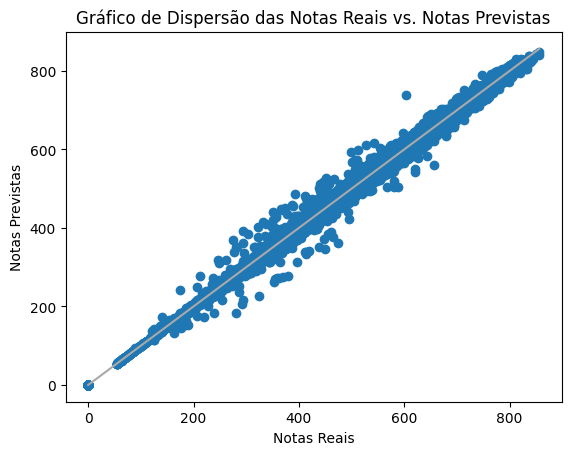

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Notas Reais')
plt.ylabel('Notas Previstas')
plt.title('Gráfico de Dispersão das Notas Reais vs. Notas Previstas')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkgrey', linestyle='-')
plt.show()

## 7 - Análise da Árvore de Decisão

Boxplot

## 8 - Conclusões

Podemos tirar algumas conclusões:

1.   O nível de educação dos pais pode afetar a performance dos estudantes, mas não é o fator mais importante.
2.   Terminar o teste de preparação é muito beneficial.
3.   Se alimentar é importante para os estudantes, e aparenta ser um fator importante.
4.   O gênero não aparenta ter uma relação com a pontuação.

Em suma, se os estudantes querem ter uma boa performance eles devem estar bem alimentados e se preparar adequadamente para a prova.


